##diabetes(당뇨병) 데이터셋을 활용한 예제 (결과치가 안좋은 사례)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
diabetes = pd.read_csv('./dataset/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 특성(X)과 타겟(y) 분리
X = diabetes.drop('Outcome', axis=1)  # Outcome 열을 제외한 모든 특성
y = diabetes['Outcome']  # 타겟 변수

In [ ]:
# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

In [ ]:
# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# 결과 출력
print('모델 성능 평가 결과:')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

모델 성능 평가 결과:
MSE: 0.1710
RMSE: 0.4136
R2 Score: 0.2550


In [ ]:
# 각 특성의 계수(가중치) 출력
feature_coefficients = pd.DataFrame({
    '특성': X.columns,
    '계수': model.coef_
})
print('\n특성별 가중치:')
print(feature_coefficients)


특성별 가중치:
                         특성        계수
0               Pregnancies  0.010468
1                   Glucose  0.005634
2             BloodPressure -0.002281
3             SkinThickness  0.000532
4                   Insulin -0.000278
5                       BMI  0.015039
6  DiabetesPedigreeFunction  0.111263
7                       Age  0.006460


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

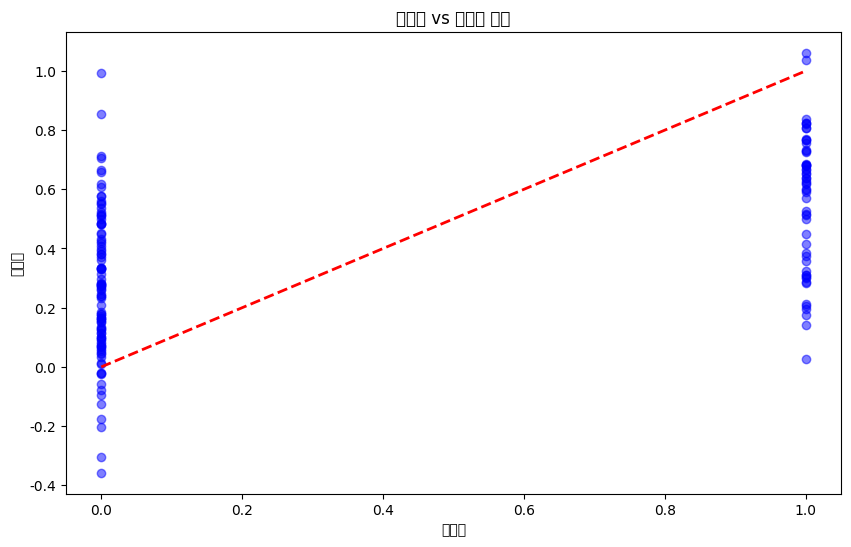

In [ ]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값 비교')
plt.show()

In [ ]:
# 예시: 첫 번째 테스트 데이터에 대한 예측
sample_data = X_test.iloc[0:1]
prediction = model.predict(sample_data)
print('\n새로운 데이터 예측 결과:')
print(f'예측값: {prediction[0]:.4f}')
print('실제 데이터:', sample_data.values[0])


새로운 데이터 예측 결과:
예측값: 0.3355
실제 데이터: [  6.    98.    58.    33.   190.    34.     0.43  43.  ]


## 랜덤포레스트를 활용한 당뇨병 데이터 알아보기 예제

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드
data = pd.read_csv('./dataset/diabetes.csv')

In [ ]:
# 특성(X)과 타겟(y) 분리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 예측
y_pred = rf_model.predict(X_test)

In [ ]:
# 교차 검증 수행
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)

In [ ]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

In [ ]:
# 결과 출력
print("모델 성능 평가:")
print("\n교차 검증 점수:")
print(f"평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

모델 성능 평가:

교차 검증 점수:
평균 정확도: 0.7657 (+/- 0.0715)

분류 리포트:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


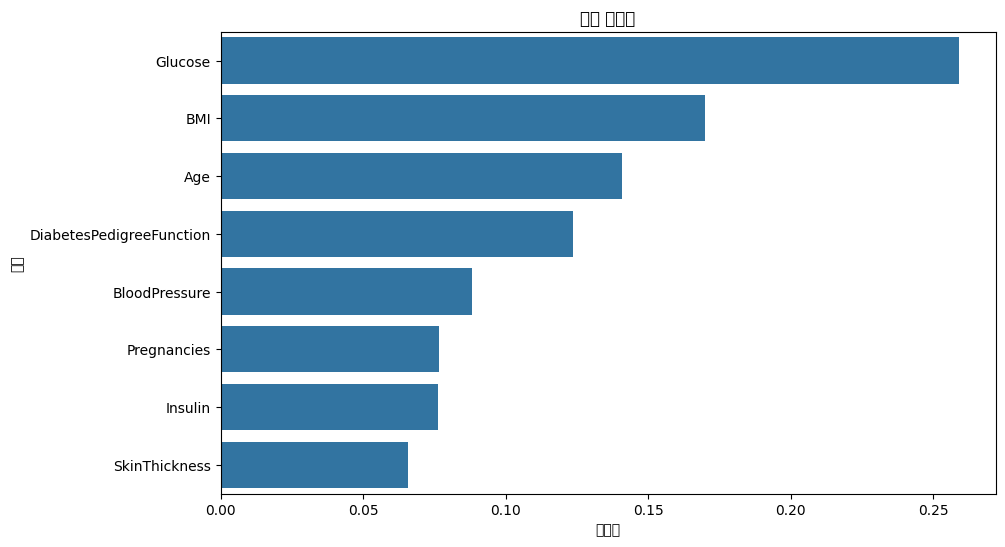

In [ ]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('특성 중요도')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

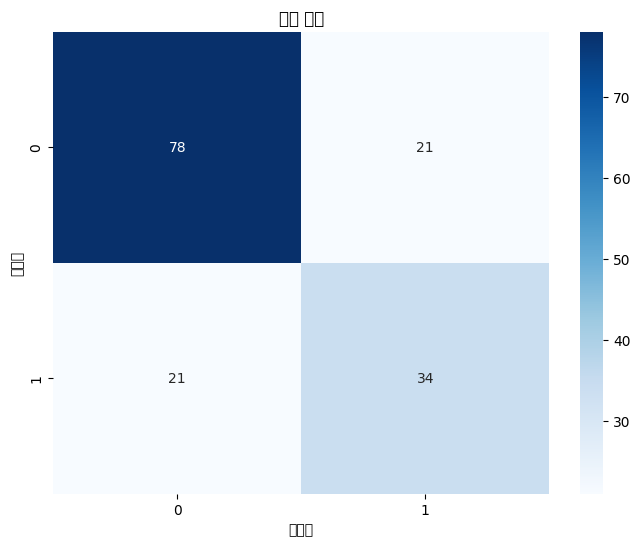

In [ ]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

In [ ]:
# 새로운 환자 데이터로 예측 예시
print("\n새로운 환자 데이터 예측 예시:")
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]  # 첫번째 인덱스 값
prediction = rf_model.predict(new_patient)
prediction_prob = rf_model.predict_proba(new_patient)

print(f"예측 결과: {'당뇨병 환자' if prediction[0] == 1 else '정상'}")
print(f"당뇨병일 확률: {prediction_prob[0][1]:.2%}")


새로운 환자 데이터 예측 예시:
예측 결과: 정상
당뇨병일 확률: 31.00%


In [ ]:
# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_scores = np.max(threshold_probs, axis=1)


예측 신뢰도 분포:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

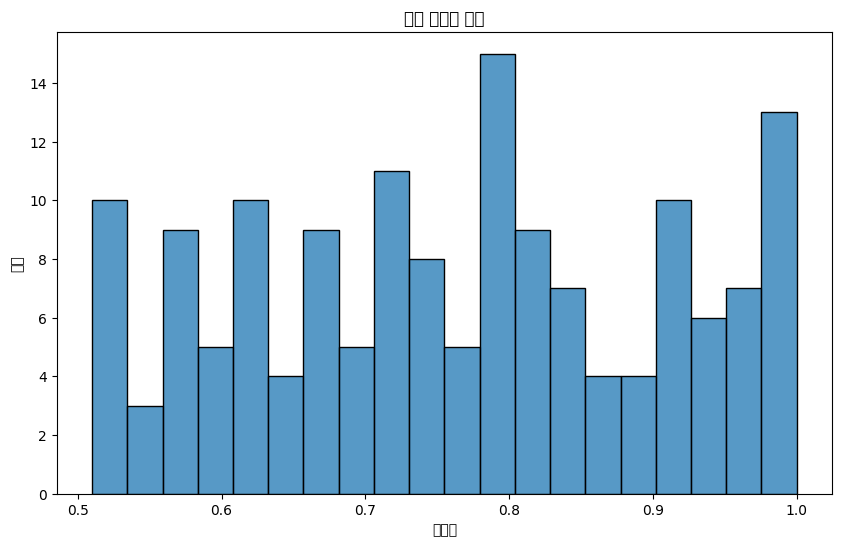

In [ ]:
print("\n예측 신뢰도 분포:")
plt.figure(figsize=(10, 6))
sns.histplot(confidence_scores, bins=20)  # bins=20 : 데이터를 20개의 구간으로 보여줌
plt.title('예측 신뢰도 분포')
plt.xlabel('신뢰도')
plt.ylabel('빈도')
plt.show()

## 보스톤 집값 분석 예제

In [ ]:
### 컬럼 설명 ###
# CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
# CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
# DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
# B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

In [ ]:
# 데이터 확인
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# 결측값 확인 및 처리
print(data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
data = data.dropna()  # 결측값 제거

In [ ]:
# 결측값 확인 및 처리
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# 주요 변수 선택
X = data[['CRIM', 'RM', 'TAX', 'LSTAT']]  # 입력 변수: CRIM(범죄율), RM(방개수), TAX(세금), LSTAT(하위계층비율
)
y = data['MEDV']  # 타겟 변수 (집값)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 41.011454419048036
R2 Score: 0.5137736507938266


In [ ]:
# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

회귀 계수: [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편: -3.831014747888201


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

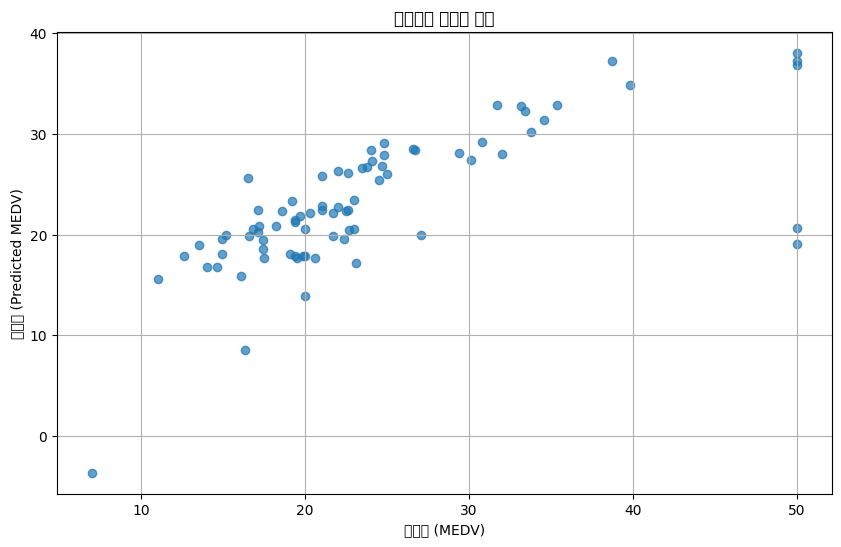

In [ ]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('실제값 (MEDV)')
plt.ylabel('예측값 (Predicted MEDV)')
plt.title('실제값과 예측값 비교')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

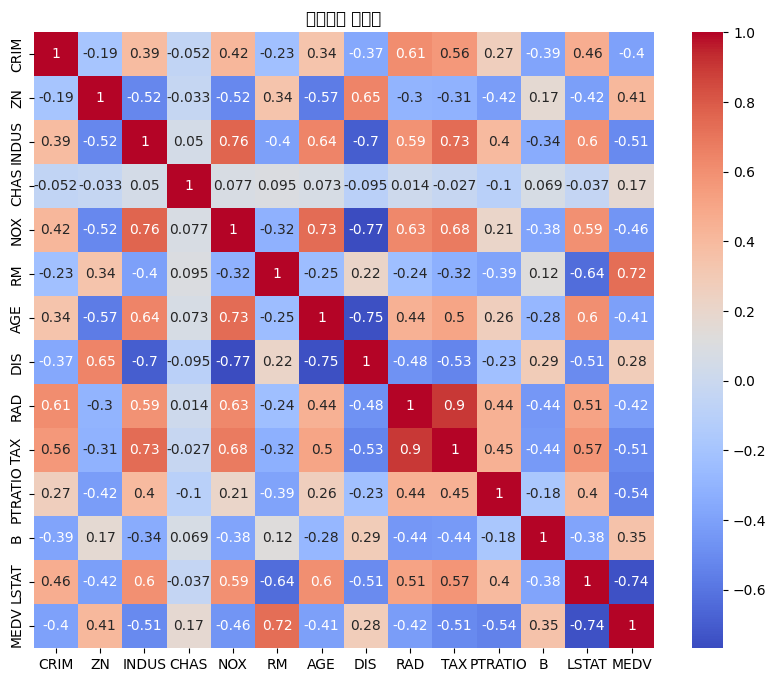

In [ ]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

### 랜덤포레스트 모델 활용한 예제(cf. 다른 회귀모델 성능 비교)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

In [ ]:
# 데이터 전처리
data = data.dropna()  # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

랜덤 포레스트 - MSE: 28.63, R2: 0.66


In [ ]:
# 2. 다른 모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 36.34, R2: 0.57
Decision Tree - MSE: 27.30, R2: 0.68


In [ ]:
# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}
best_model = max(results, key=lambda x: results[x]['R2'])
print("\n최적 모델:", best_model)


최적 모델: Decision Tree


In [ ]:
# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


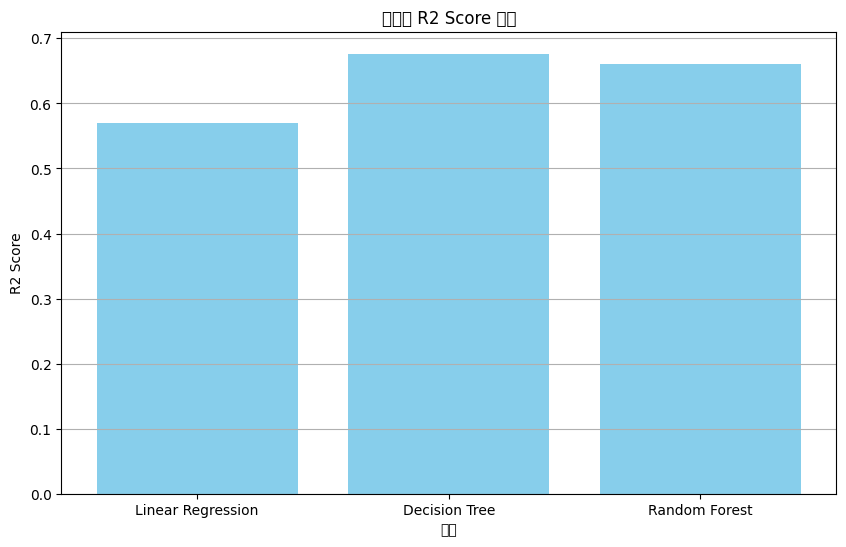

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

In [ ]:
# 4. 랜덤 포레스트 하이퍼파라미터 튜닝 (옵션)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
print("\n최적 하이퍼파라미터:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")

튜닝된 랜덤 포레스트 - MSE: 28.63, R2: 0.66


### DB생성 및 연결 예제

In [ ]:
import pandas as pd

# CSV 파일 경로 설정
file_path = "dataset/diabetes.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
# 데이터프레임 확인
df.head()

In [ ]:
# pymysql 설치 : pip install pymysql
import pymysql

In [ ]:
# MariaDB 연결 설정
def connect_to_mariadb():
    return pymysql.connect(
        host='localhost',          # MariaDB 서버 주소
        user='root',               # 사용자 이름
        password='0000000',  # 비밀번호
        database='test',  # 데이터베이스 이름
        charset='utf8mb4'
    )

In [ ]:
# 연결 테스트
connection = connect_to_mariadb()
print("MariaDB에 연결되었습니다!")
connection.close()

In [ ]:
# 테이블 및 컬럼 생성
def create_table_from_csv(connection, df, table_name):
    cursor = connection.cursor()

    # 테이블 생성 SQL 동적 생성
    columns = []
    for col, dtype in zip(df.columns, df.dtypes):
        if "int" in str(dtype):
            col_type = "INT"
        elif "float" in str(dtype):
            col_type = "FLOAT"
        else:
            col_type = "VARCHAR(255)"  # 문자열 타입 처리
        columns.append(f"`{col}` {col_type}")

    columns_sql = ", ".join(columns)
    create_table_sql = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({columns_sql});"

    # 테이블 생성 실행
    cursor.execute(create_table_sql)
    connection.commit()
    print(f"테이블 '{table_name}'이(가) 생성되었습니다.")

In [ ]:
# 테이블 생성 실행
table_name = "diabetes"  # 생성할 테이블 이름
connection = connect_to_mariadb()
create_table_from_csv(connection, df, table_name)
connection.close()

In [ ]:
# CSV 데이터를 MariaDB로 업로드
def insert_data_to_table(connection, df, table_name):
    cursor = connection.cursor()

    # 데이터 삽입 SQL 동적 생성
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_sql = f"INSERT INTO `{table_name}` ({', '.join(df.columns)}) VALUES ({placeholders})"

    # 데이터 삽입 실행
    for _, row in df.iterrows():
        cursor.execute(insert_sql, tuple(row))

    connection.commit()
    print(f"테이블 '{table_name}'에 데이터가 삽입되었습니다.")

In [ ]:
# 데이터 삽입 실행
connection = connect_to_mariadb()
insert_data_to_table(connection, df, table_name)
connection.close()

In [ ]:
# MariaDB에서 데이터 읽기
def fetch_data_from_table(connection, table_name):
    query = f"SELECT * FROM `{table_name}`"
    df = pd.read_sql(query, connection)
    return df

In [ ]:
# 데이터 읽기
connection = connect_to_mariadb()
table_name = "diabetes"  # 불러올 테이블 이름

In [ ]:
# 데이터 읽기
df_from_db = fetch_data_from_table(connection, table_name)

In [ ]:
# 데이터 확인
print("MariaDB에서 불러온 데이터:")
print(df_from_db.head())

In [ ]:
connection.close()

### 미세먼지(PM10) 예측 예제

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# 데이터 로드
file_path = "dataset/seoul_pm10.csv"  # 데이터 파일 경로
df = pd.read_csv(file_path, encoding='cp949')

In [ ]:
print("데이터 크기:", df.shape)
print("\n처음 5개 행:")
display(df.head())

In [ ]:
# 기본 데이터 정보 확인
print("\n데이터 기간:", df['date'].min(), "~", df['date'].max())
print("총 관측 수:", len(df))
print("지역 수:", df['area'].nunique())
print("\n결측치 개수:")
display(df.isnull().sum())

In [ ]:
# 데이터 전처리
# 날짜 변환
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# 결측치 처리
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].mean())

In [ ]:
# 시간 관련 피처 추가
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

In [ ]:
# 지역 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['area'], prefix='area')

In [ ]:
# 전처리된 데이터 확인
print("\n전처리된 데이터 샘플:")
display(df_encoded.head())

In [ ]:
# PM10 모델 학습
features_pm10 = ['pm2.5', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm10 = df_encoded[features_pm10]
y_pm10 = df_encoded['pm10']

In [ ]:
# PM2.5 모델 학습
features_pm25 = ['pm10', 'hour', 'day_of_week', 'month'] + [col for col in df_encoded.columns if col.startswith('area_')]
X_pm25 = df_encoded[features_pm25]
y_pm25 = df_encoded['pm2.5']

In [ ]:
# 데이터 분할
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [ ]:
# 모델 학습
model_pm10 = LinearRegression()
model_pm25 = LinearRegression()

In [ ]:
model_pm10.fit(X_train_pm10, y_train_pm10)
model_pm25.fit(X_train_pm25, y_train_pm25)

In [ ]:
# 모델 평가
y_pred_pm10 = model_pm10.predict(X_test_pm10)
y_pred_pm25 = model_pm25.predict(X_test_pm25)

In [ ]:
print("\nPM10 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm10, y_pred_pm10):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm10, y_pred_pm10):.4f}")

In [ ]:
print("\nPM2.5 모델 성능:")
print(f"R² Score: {r2_score(y_test_pm25, y_pred_pm25):.4f}")
print(f"MSE: {mean_squared_error(y_test_pm25, y_pred_pm25):.4f}")

In [ ]:
# 2023년 1월 1일 예측을 위한 함수
def create_prediction_data(area):
    predictions = []
    for hour in range(24):
        pred_data = {
            'hour': hour,
            'day_of_week': 6,  # 2023년 1월 1일은 일요일
            'month': 1
        }

        # 지역 원-핫 인코딩 추가
        for area_col in [col for col in df_encoded.columns if col.startswith('area_')]:
            pred_data[area_col] = 1 if area_col == f'area_{area}' else 0

        predictions.append(pred_data)

    return pd.DataFrame(predictions)

In [ ]:
# 사용자 입력 - 지역 선택
areas = sorted(df['area'].unique())
print("\n예측 가능한 지역:")
display(areas)

In [ ]:
# 예시로 한 지역 선택 (실제로는 사용자가 선택)
selected_area = areas[0]  # 첫 번째 지역 선택
print(f"\n선택된 지역: {selected_area}")

In [ ]:
# 2023년 1월 1일 예측
future_data = create_prediction_data(selected_area)
pm10_predictions = []
pm25_predictions = []

In [ ]:
# 반복 예측 (PM10과 PM2.5 상호 의존성 처리)
for hour in range(24):
    hour_data = future_data.iloc[[hour]].copy()

    # 초기값 설정
    hour_data['pm2.5'] = df['pm2.5'].mean()
    hour_data['pm10'] = df['pm10'].mean()

    # 반복 예측으로 정확도 향상
    for _ in range(3):
        pm10_pred = model_pm10.predict(hour_data[features_pm10])
        pm25_pred = model_pm25.predict(hour_data[features_pm25])

        hour_data['pm10'] = pm10_pred
        hour_data['pm2.5'] = pm25_pred

    pm10_predictions.append(pm10_pred[0])
    pm25_predictions.append(pm25_pred[0])

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(15, 10))

In [ ]:
# PM10 그래프
plt.subplot(2, 1, 1)
plt.plot(range(24), pm10_predictions, marker='o', linewidth=2, markersize=8)
plt.title(f'{selected_area} PM10 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# PM2.5 그래프
plt.subplot(2, 1, 2)
plt.plot(range(24), pm25_predictions, marker='o', linewidth=2, markersize=8, color='orange')
plt.title(f'{selected_area} PM2.5 예측 (2023년 1월 1일)')
plt.xlabel('시간')
plt.ylabel('농도 (μg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 예측 결과 통계
print("\nPM10 예측 통계:")
print(f"평균: {np.mean(pm10_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm10_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm10_predictions):.1f} μg/m³")

In [ ]:
print("\nPM2.5 예측 통계:")
print(f"평균: {np.mean(pm25_predictions):.1f} μg/m³")
print(f"최대: {np.max(pm25_predictions):.1f} μg/m³")
print(f"최소: {np.min(pm25_predictions):.1f} μg/m³")

In [ ]:
# 시간별 예측값 데이터프레임 생성
hourly_predictions = pd.DataFrame({
    '시간': range(24),
    'PM10': [f"{x:.1f}" for x in pm10_predictions],
    'PM2.5': [f"{x:.1f}" for x in pm25_predictions]
})

In [ ]:
print("\n시간별 예측값:")
display(hourly_predictions)

In [ ]:
# 실제값과 예측값 비교 시각화 (테스트 데이터 기준)
plt.figure(figsize=(15, 10))

In [ ]:
# PM10 비교
plt.subplot(2, 1, 1)
plt.scatter(y_test_pm10, y_pred_pm10, alpha=0.5)
plt.plot([y_test_pm10.min(), y_test_pm10.max()],
         [y_test_pm10.min(), y_test_pm10.max()],
         'r--', lw=2)
plt.xlabel('실제 PM10')
plt.ylabel('예측 PM10')
plt.title('PM10 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# PM2.5 비교
plt.subplot(2, 1, 2)
plt.scatter(y_test_pm25, y_pred_pm25, alpha=0.5, color='orange')
plt.plot([y_test_pm25.min(), y_test_pm25.max()],
         [y_test_pm25.min(), y_test_pm25.max()],
         'r--', lw=2)
plt.xlabel('실제 PM2.5')
plt.ylabel('예측 PM2.5')
plt.title('PM2.5 실제값 vs 예측값 (테스트 데이터)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 직원 퇴사예측 예제

In [ ]:
# 컬럼 설명 : satisfaction_level(직원만족도점수), last_evaluation(고용주평가점수), numbers_projects(할당된 프로젝트수)
# average_monthly_hours(한달동안 직원이 일한 평균시간), time_spent_company(회사에서 근무한 연수), work_accident(근무중 사고유무무)
# promotion_last_5years(지난 5년 직원이 승진했는지 여부), Departments(부서), Salary(월급수준 낮음, 중간, 높음), left(직원퇴사 여부부)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# 데이터 로드
df = pd.read_csv('dataset/HR_comma_sep.csv', encoding='cp949')

In [ ]:
# 데이터 확인
df.head()

In [ ]:
# 'left' 열이 정수형인지 확인하고 필요시 변환
if df['left'].dtype != 'int64':
    df['left'] = df['left'].astype(int)

In [ ]:
# 범주형 변수 확인 및 전처리
# 'Departments ' 끝에 공백 제거
df.rename(columns={'Departments ': 'Departments'}, inplace=True)

In [ ]:
# 원-핫 인코딩 (범주형 변수 처리)
df = pd.get_dummies(df, columns=['Departments', 'salary'], drop_first=True)

In [ ]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('left', axis=1)
y = df['left']

In [ ]:
# 데이터 분할 (Train: 80%, Test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 모델 학습 - 랜덤 포레스트
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
# 예측
y_pred = model.predict(X_test_scaled)

In [ ]:
# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Feature Importance (중요 변수 확인)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
print("\nFeature Importances:")
print(feature_importances)